<a href="https://colab.research.google.com/github/rennanvra/Praktikum-IPSD/blob/main/MODUL%204/guided.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE

Load Data

In [ ]:
train_features = pd.read_csv('/content/train_features - train_features.csv')
train_labels = pd.read_csv('/content/train_labels - train_labels.csv')
train = pd.concat([train_features, train_labels], axis=1)

EDA (Exploratory Data Analysis)

In [ ]:
train.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
tahun_kelahiran,3817.0,1.967824e+03,1.176813e+01,1899.0,1959.0,1968.0,1976.0,2000.0
pendapatan,3627.0,1.144832e+08,4.346042e+07,5073000.0,81125122.0,115621394.0,150495956.0,332884000.0
jumlah_anak_balita,3627.0,2.930797e-01,4.730627e-01,0.0,0.0,0.0,1.0,2.0
jumlah_anak_remaja,3613.0,3.537227e-01,4.930139e-01,0.0,0.0,0.0,1.0,2.0
terakhir_belanja,3645.0,4.723155e+01,2.706851e+01,0.0,25.0,47.0,69.0,128.0
belanja_buah,3636.0,5.980424e+04,7.402498e+04,0.0,7907.0,26456.0,86162.0,396508.0
belanja_daging,3639.0,4.385748e+05,5.120427e+05,0.0,49479.5,221993.0,686355.5,3489675.0
belanja_ikan,3624.0,8.142900e+04,9.997623e+04,0.0,10115.0,36054.5,121380.0,621600.0
belanja_kue,3603.0,6.337797e+04,7.943546e+04,0.0,7947.0,27795.0,89502.5,542164.0
pembelian_diskon,3639.0,2.125584e+00,2.100133e+00,0.0,0.0,2.0,3.0,20.0


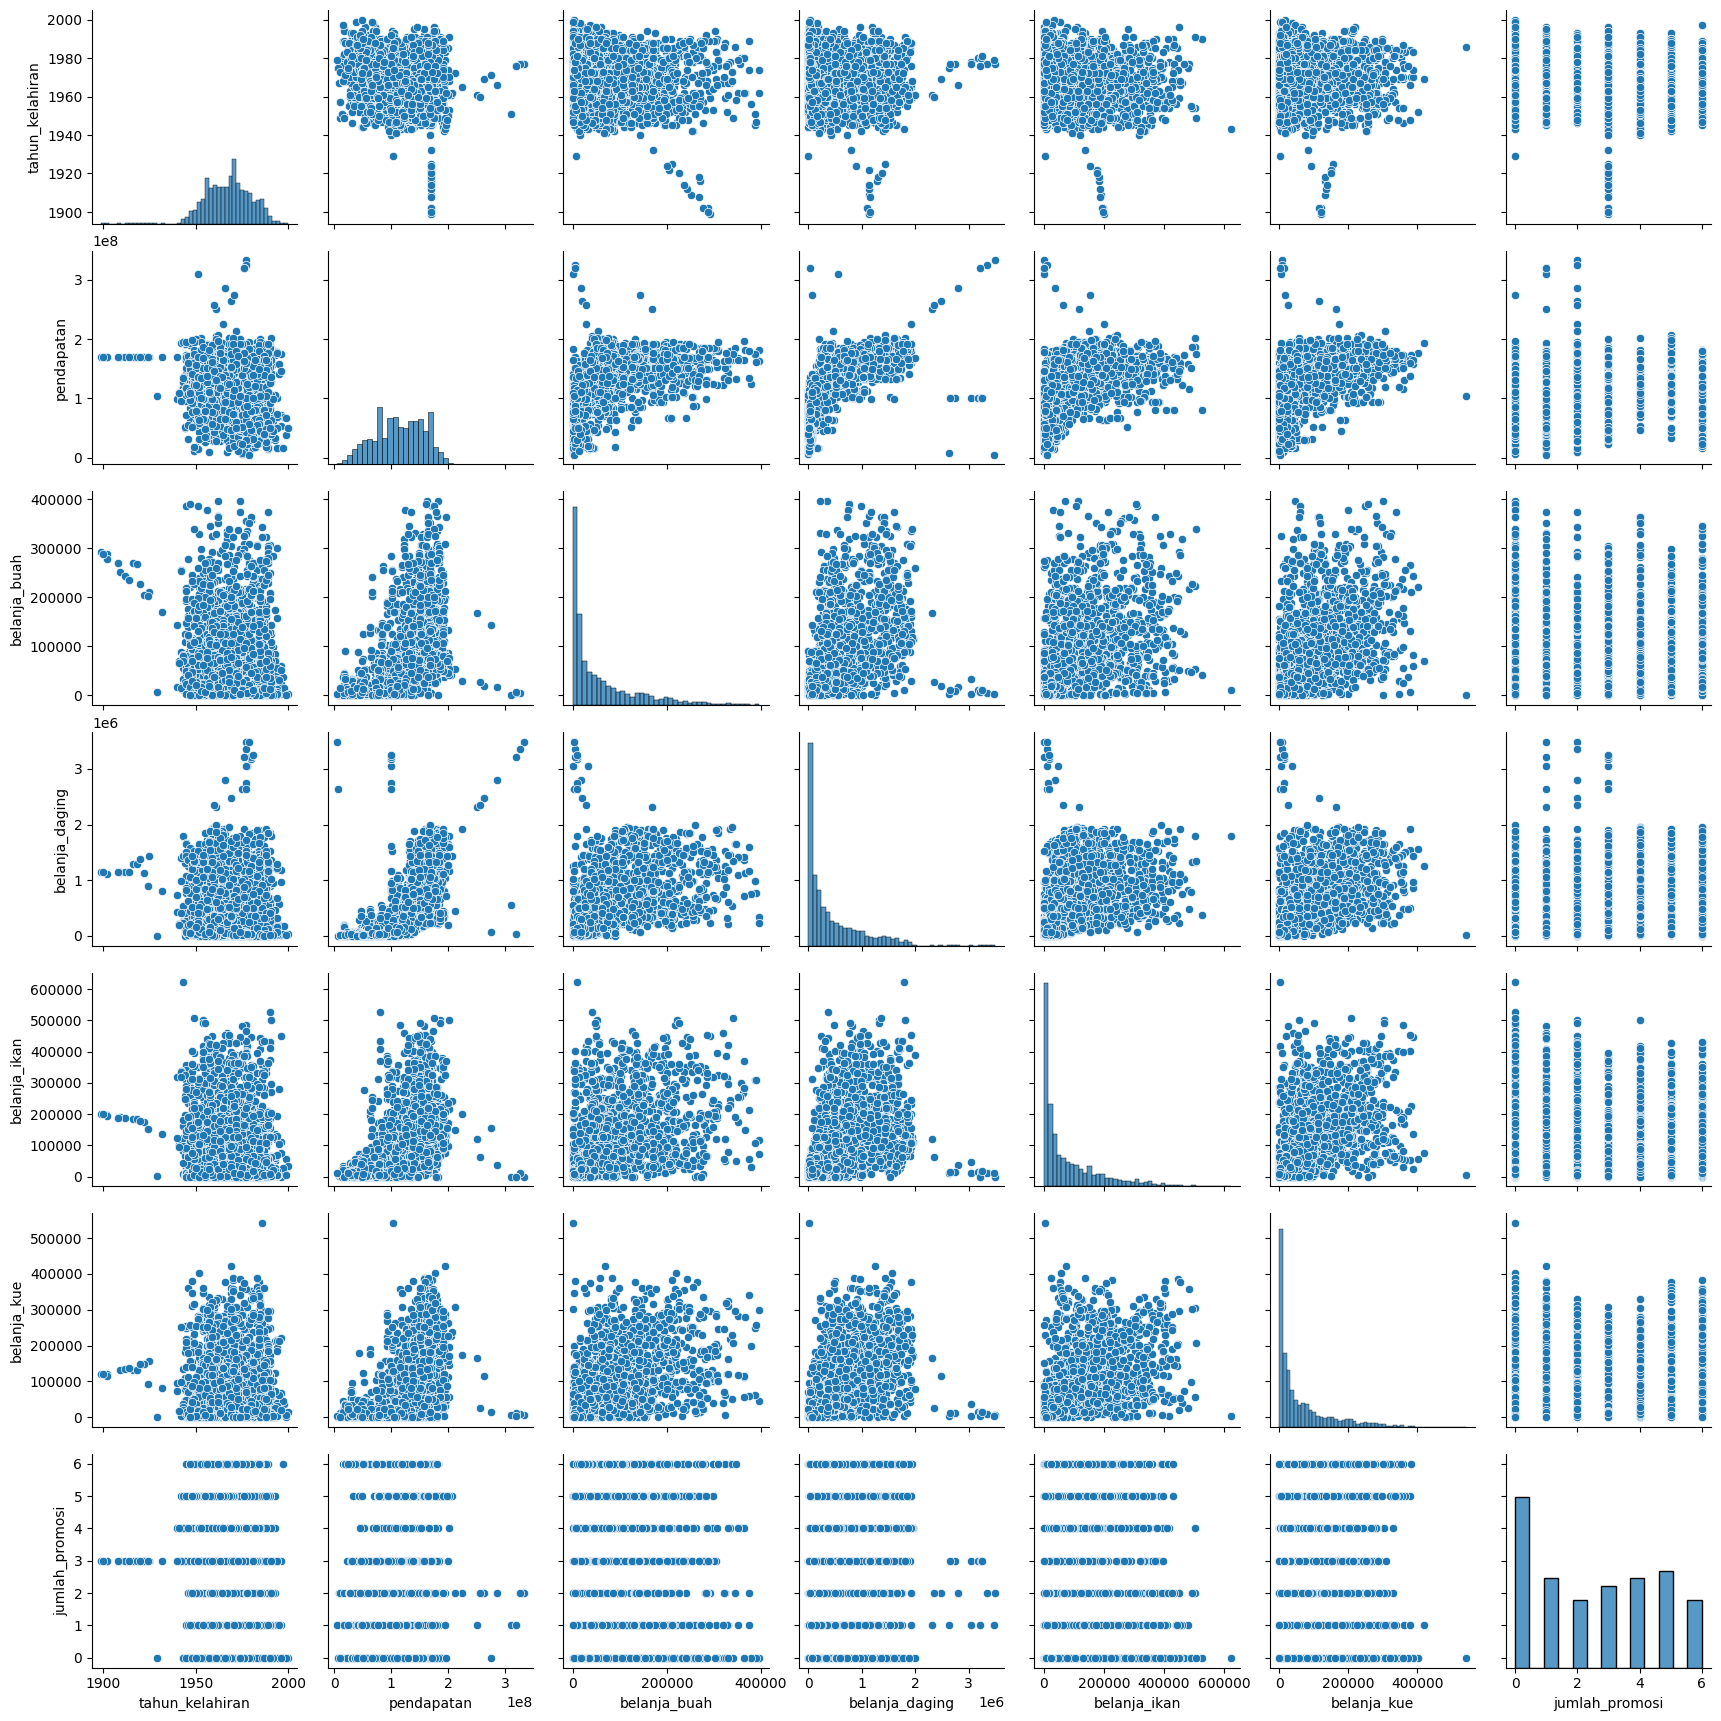

In [ ]:
num_cols = [
    'tahun_kelahiran',
    'pendapatan',
    'belanja_buah',
    'belanja_daging',
    'belanja_ikan',
    'belanja_kue',
    'jumlah_promosi'
]

sns.pairplot(train[num_cols])
plt.show()

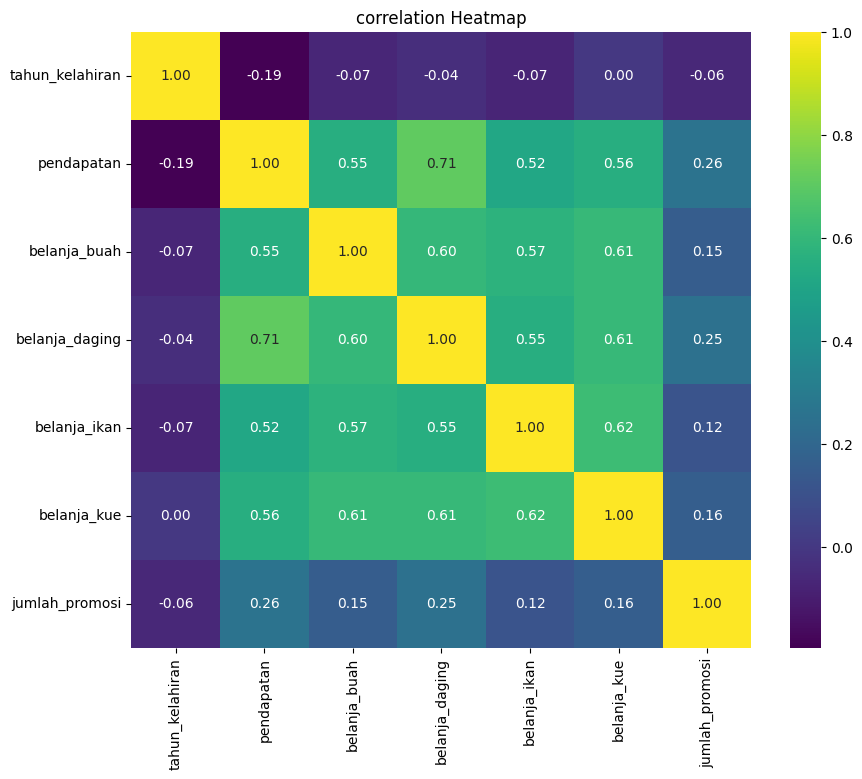

In [ ]:
corr = train[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title('correlation Heatmap')
plt.show()

Pre-pocessing

In [ ]:
train.isnull().sum() / (len(train))*100

,0
tahun_kelahiran,0.000000
pendidikan,4.951533
status_pernikahan,5.554100
pendapatan,4.977731
jumlah_anak_balita,4.977731
jumlah_anak_remaja,5.344511
terakhir_belanja,4.506157
belanja_buah,4.741944
belanja_daging,4.663348
belanja_ikan,5.056327


In [ ]:
train.drop(columns='tanggal_menjadi_anggota', inplace=True)

In [ ]:
train[train.select_dtypes(exclude=['number']).columns]

,pendidikan,status_pernikahan
0,Sarjana,Rencana Menikah
1,Sarjana,Rencana Menikah
2,Sarjana,Menikah
3,Magister,Rencana Menikah
4,Sarjana,Rencana Menikah
...,...,...
3812,Magister,Menikah
3813,Doktor,Rencana Menikah
3814,Magister,Menikah
3815,SMA,Rencana Menikah


eksistensi data yang masih berisikan nilai non-numerikal harus diatasi dengan encoding agar feature tetap dapat digunakan dalam pemodelan nantinya.

In [ ]:
print("Nilai unik data kategorikal : ")
print(f"pendidikan: {train['pendidikan'].unique()}")
print(f"status_pernikahan: {train['status_pernikahan'].unique()}")

Nilai unik data kategorikal : 
pendidikan: ['Sarjana' 'Magister' 'SMA' 'SMP' 'Doktor' nan '5']
status_pernikahan: ['Rencana Menikah' 'Menikah' 'Sendiri' 'Cerai' nan 'Cerai Mati' '5']


selain nilai data yang masih non-numerikal, terdapat juga anomali berupa string

In [ ]:
# Mengubah data anomali menjadi nilai NaN
train['pendidikan'] = train['pendidikan'].replace('5', np.nan)
train['status_pernikahan'] = train['status_pernikahan'].replace('5', np.nan)

Encoding

In [ ]:
label_encoding = {
    'SMP': 0,
    'SMA': 1,
    'Sarjana': 2,
    'Magister': 3,
    'Doktor': 4
}

# Encode 'pendidikan column using manual label encoding
train['pendidikan'] = train['pendidikan'].map(label_encoding)

In [ ]:
label_mapping = {
    'Menikah': 1,
    'Rencana Menikah': 2,
    'Sendiri': 3,
    'Cerai Mati': 4,
    'Cerai': 5
}

# Apply label encoding to both train & test data
train['status_pernikahan'] = train['status_pernikahan'].map(label_mapping)

Winsorizing Outliers

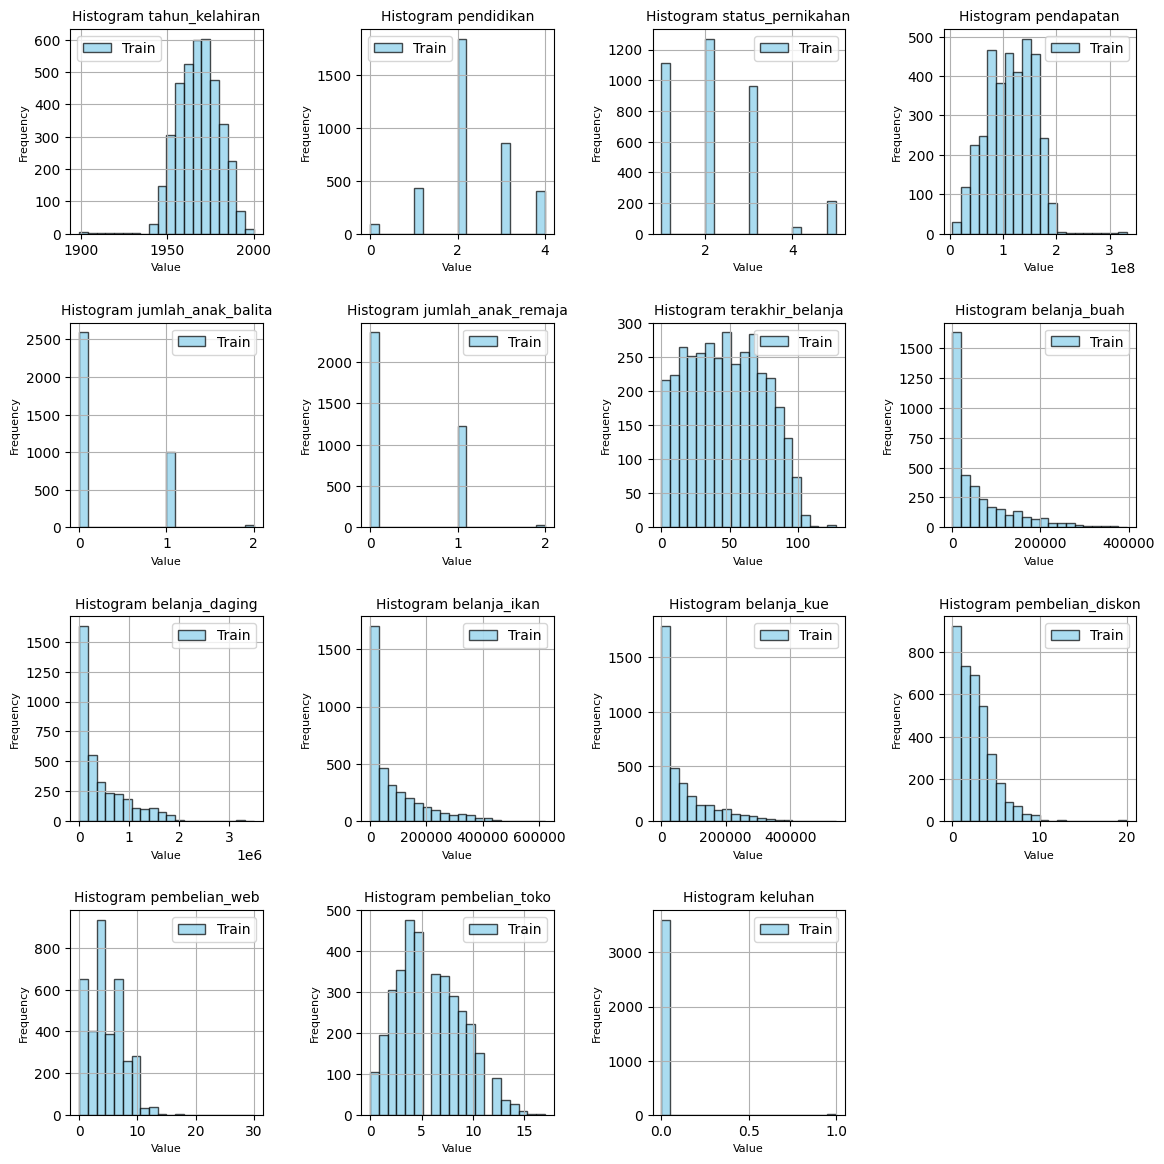

In [ ]:
columns_to_plot = [col for col in train.columns if col != 'jumlah_promosi']
num_cols = len(columns_to_plot)
num_rows = (num_cols + 3) // 4

fig_width = 12
fig_height = 3 * num_rows

fig, axes = plt.subplots(num_rows, 4, figsize=(fig_width, fig_height))

for i, column in enumerate(columns_to_plot):
    ax = axes[i // 4, i % 4]
    ax.hist(train[column], bins=20, color='skyblue', alpha=0.7, edgecolor='black', label='Train')
    ax.set_title(f'Histogram {column}', fontsize=10)
    ax.set_xlabel('Value', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.legend()
    ax.grid(True)

for i in range(num_cols, num_rows * 4):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(pad=2.0)
plt.show()

In [ ]:
def winsorize(data, columns_to_winsorize=[]):
  if not columns_to_winsorize:
      raise ValueError("Please specify columns to winsorize in columns_to_winsorize argument.")

  for col in columns_to_winsorize:
    if col not in data.columns or not pd.api.types.is_numeric_dtype(data[col]):
      continue
    lower_bound = data[col].quantile(0.01, interpolation='nearest')
    upper_bound = data[col].quantile(0.99, interpolation='nearest')

    data.loc[data[col] < lower_bound, col] = lower_bound
    data.loc[data[col] > upper_bound, col] = upper_bound


columns_to_winsorize = ['pendapatan', 'belanja_buah', 'belanja_daging', 'pembelian_web']
winsorize(train, columns_to_winsorize)

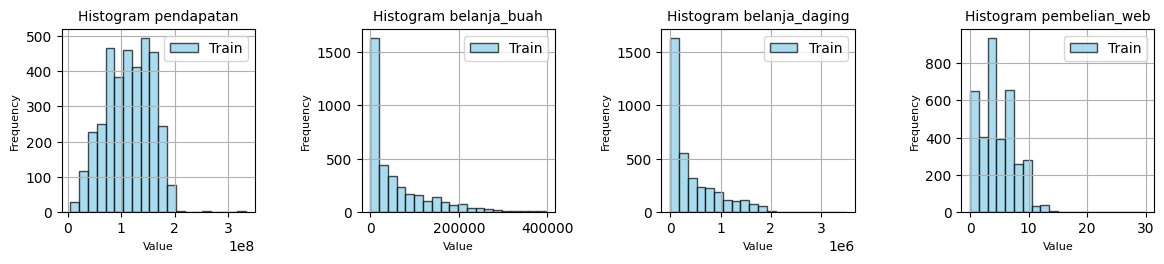

In [ ]:
columns_to_plot = ['pendapatan', 'belanja_buah', 'belanja_daging', 'pembelian_web']
num_cols = len(columns_to_plot)
num_rows = (num_cols + 3) // 4

fig_width = 12
fig_height = 3 * num_rows

fig, axes = plt.subplots(1, num_cols, figsize=(fig_width, fig_height))

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.hist(train[column], bins=20, color='skyblue', alpha=0.7, edgecolor='black', label='Train')
    ax.set_title(f'Histogram {column}', fontsize=10)
    ax.set_xlabel('Value', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.legend()
    ax.grid(True)

plt.tight_layout(pad=2.0)
plt.show()

Imputasi nilai Nan

In [ ]:
train_second = train_copy()
train_third = train_copy()

NameError: name 'train_copy' is not defined

In [ ]:
train_second = train.fillna(method='bfill')

<ipython-input-34-15eb7cf55f73>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_second = train.fillna(method='bfill')


In [ ]:
train_third = train.fillna(method='ffill')

<ipython-input-36-a9263627e337>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_third = train.fillna(method='ffill')


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterative_imputer = IterativeImputer(

)